<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se na criação de um Modelo de Segmentação de Clientes para auxílio no Marketing Digital. </i>       
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>     Segmentar clientes ajuda empresas a fechar melhores negócios, sendo uma vantagem competitiva frente à concorrência. O objetivo desta estratégia é aumentar a eficiência na atuação da empresa junto aos clientes, reunindo o maior número possível de informações sobre o público-alvo que pretende atingir. Dessa forma, a intensão deste projeto é segmentar os clientes, para que assim possamos enviar informações realmente úteis para a área de Marketing.


</i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>     Neste trabalho, usaremos uma simplificação do Banco de Dados da Olist para identificar a frequência, recência e receita dos consumidores e agrupa-los em categorias de compras. Assim podemos fazer campanhas de marketing específicas, além de criar programas de recompensas para os clientes que mais consomem.
</i> 
</p>  





## Etapas

1) Realizar uma Análise Exploratória Univariada

2) Realizar uma Análise Exploratória Bivariada

3) Pré-Processar o DataFrame com técnicas de Encoding, Normalização, Valores Faltantes via Pipelines 

4) Aplicar um Modelo de Clustering sem PCA e um Modelo de Clustering com PCA 

5) Analisar a explicabilidade do modelo com PCA e aplicar testes de hipótese para entender se a diferença é significativa ou não 

6) Consolidar os resultados das análises 

# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [33]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.diagnostic import lilliefors


# Bibliotecas de Manipulação de Tempo
import time
import datetime

# Bibliotecas de Pré-Processamento e Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Bibliotecas de Modelos de Machine Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import silhouette_score


# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

## Funções de Visualização

* Plota Barras

In [34]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', hue = hue)
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1


* Plota Histogramas 

In [35]:
def plota_histograma(lista_variaveis, df, linhas, colunas):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        mediana = df[lista_variaveis[k]].median()
        media = round(df[lista_variaveis[k]].mean(), 2)
        plt.figure(figsize = (14, 4))
        ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', bins = 30)
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
        ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
        plt.legend(loc = 'best')
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = round(df[lista_variaveis[k]].mean(), 2)
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.legend(loc = 'best')
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = round(df[lista_variaveis[k]].mean(), 2)
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.legend(loc = 'best')
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = round(df[lista_variaveis[k]].mean(), 2)
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.legend(loc = 'best')
                k = k + 1

* Plota Boxplot

In [36]:
def plota_boxplot(lista_variaveis, df, linhas, colunas):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        plt.figure(figsize = (14, 4))
        ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', orient = 'h',)
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], orient = 'h',)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], orient = 'h',)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], orient = 'h',)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1

## Funções de Estatística

* Analisa Correlação

In [37]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize = (14, 7))
    sns.heatmap(df.corr(method = metodo), vmin = -1, vmax = 1, cmap = 'magma', annot = True)
    plt.title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.show()

* Analisa Normalidade 

In [38]:
def analisa_normalidade(amostra1, amostra2, variavel):

    kolmogorov_amostra_1 = statsmodels.stats.diagnostic.lilliefors(amostra1[variavel], dist = 'norm')
    kolmogorov_amostra_2 = statsmodels.stats.diagnostic.lilliefors(amostra2[variavel], dist = 'norm')

    if kolmogorov_amostra_1[1] and kolmogorov_amostra_2[1] < 0.05:
        print(f'Pelo Teste de Hipótese de Kolmogorov, a variável "{variavel}" não segue uma Distribuição Normal')
    else:
        print(f'Pelo Teste de Hipótese de Kolmogorov, a variável "{variavel}" não segue uma Distribuição Normal')

    ax1 = plt.subplot(121)
    stats.probplot(amostra1[variavel], dist = 'norm', plot = plt)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    ax1 = plt.subplot(122)
    stats.probplot(amostra2[variavel], dist = 'norm', plot = plt)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()

    
    plt.show()



* Teste de Hipótese para Duas Amostras Independentes 

In [39]:
def teste_hipotese_duas_amostras_independentes(parametrico, amostra1, amostra2, variavel):

    media_amostra_1 = amostra1[variavel].mean()
    media_amostra_2 = amostra2[variavel].mean()
    mediana_amostra_1 = amostra1[variavel].median()
    mediana_amostra_2 = amostra2[variavel].median()

    if parametrico == True: 
        print(f'Média Amostra 1: {media_amostra_1}')
        print(f'Média Amostra 2: {media_amostra_2}')
        stat, p_value = ztest(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese Z, não há diferença significativa entre as médias da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese Z, há diferença significativa entre as médias da Amostra 1 e Amostra 2')
    else:
        print(f'Mediana Amostra 1: {mediana_amostra_1}')
        print(f'Mediana Amostra 2: {mediana_amostra_2}')
        stat, p_value = stats.mannwhitneyu(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese de Mann Whitney, não há diferença significativa entre as medianas da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2')

## Funções de Machine Learning

* Definição do Número de Clusters pelo Elbow Method

In [40]:
def elbow_method(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])
    wcss = []
    for n_clusters in np.arange(1, 11):
        kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
        kmeans.fit(padronizado)
        # Inertia: Método para gerar o WCSS
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    sns.lineplot(np.arange(1, 11), wcss, marker = 'o', color = 'orange')
    plt.title('The Elbow Method')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.box(False)
    plt.show()

# <font color='red' style='font-size: 40px;'> 1.0 Entendimento das Bases de Dados </font>
<hr style='border: 2px solid red;'>

## 1.1) Definição dos Campos 

> 1. id_cliente: id usado pelo cliente na compra

> 2. id_unico_cliente: id único dado para o cliente em função do IP

> 3. item_id: id do item comprado

> 4. cep_cliente: CEP do cliente

> 5. cidade_cliente: Cidade do Cliente

> 6. estado_cliente: Estado do Cliente

> 7. id_pedido: id do pedido

> 8. stauts_pedido: Flag para saber se o pedido foi entregue ou não

> 9. horario_pedido: horário e data que o pedido foi feito

> 10. pedido_aprovado: horário e data que o pedido foi aprovado

> 11. pedido_entregador: horário e data que o entregador recebeu o pedido

> 12. pedido_entregue: horário e data que o pedido foi entregue

> 13. data_estimada: horario e data estimada de entrega

> 14. id_vendedor: id do vendedor

> 15. preco: preço do produto

> 16. frete: preço do frete

> 17. pagamento_sequencial: caso o cliente efetue uma compra realizando mais de um método de pagamento, ele acionará um pagamento sequencial criado para acomodar as ordens de pagamento

> 18. pagamento_tipo: meio de pagamento

> 19. pagamento_prestacoes: número de prestações que o cliente escolheu

> 20. pagamento_valor: valor pago

> 21. review: nota que o consumidor dará

> 22. categoria: categoria do produto

> 23. cep_vendedor: CEP do vendedor

> 24. cidade_vendedor: Cidade do Vendedor

> 25. estado_vendedor: Estado do Vendedor


In [41]:
df_raw = pd.read_csv('./data/BancoDeDados.csv')
df_raw.head()

,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,cep_vendedor,cidade_vendedor,estado_vendedor
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,1,credit_card,7,140.61,3,moveis_escritorio,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,1,credit_card,10,137.58,4,moveis_escritorio,8577,itaquaquecetuba,SP


## 1.2) Tipo das Variáveis

In [42]:
categoricas = [column for column in df_raw.columns if df_raw[column].dtype.name == 'object']
numericas = [column for column in df_raw.columns if (df_raw[column].dtype.name == 'int64') or (df_raw[column].dtype.name == 'float64')]

print(f'Colunas Categóricas: {categoricas}')
print()
print(f'Colunas Quantitativas: {numericas}')

Colunas Categóricas: ['id_cliente', 'id_unico_cliente', 'cidade_cliente', 'estado_cliente', 'id_pedido', 'status_pedido', 'horario_pedido', 'pedido_aprovado', 'pedido_entregador', 'pedido_entregue', 'data_estimada', 'id_vendedor', 'pagamento_tipo', 'categoria', 'cidade_vendedor', 'estado_vendedor']

Colunas Quantitativas: ['item_id', 'cep_cliente', 'preco', 'frete', 'pagamento_sequencial', 'pagamento_prestacoes', 'pagamento_valor', 'review', 'cep_vendedor']


## 1.3) Conferindo os Dados

In [43]:
df_raw.isnull().sum()

id_cliente                 0
id_unico_cliente           0
item_id                    0
cep_cliente                0
cidade_cliente             0
estado_cliente             0
id_pedido                  0
status_pedido              0
horario_pedido             0
pedido_aprovado           14
pedido_entregador       1213
pedido_entregue         2515
data_estimada              0
id_vendedor                0
preco                      0
frete                      0
pagamento_sequencial       0
pagamento_tipo             0
pagamento_prestacoes       0
pagamento_valor            0
review                     0
categoria                  0
cep_vendedor               0
cidade_vendedor            0
estado_vendedor            0
dtype: int64

## 1.4) Criando novo DataFrame

In [44]:
df_trusted = df_raw.copy()

# <font color='red' style='font-size: 40px;'> 2.0 Análise Exploratória  - Foco em Análises Univariadas </font>
<hr style='border: 2px solid red;'>

## 2.1) Análise Numérica 

,preco,frete,pagamento_prestacoes,pagamento_valor
count,116581.00,116581.00,116581.00,116581.00
mean,120.75,20.06,2.95,172.91
std,183.85,15.85,2.78,267.62
min,0.85,0.00,0.00,0.00
25%,39.90,13.08,1.00,61.00
50%,74.90,16.32,2.00,108.19
75%,134.90,21.22,4.00,189.72
max,6735.00,409.68,24.00,13664.08


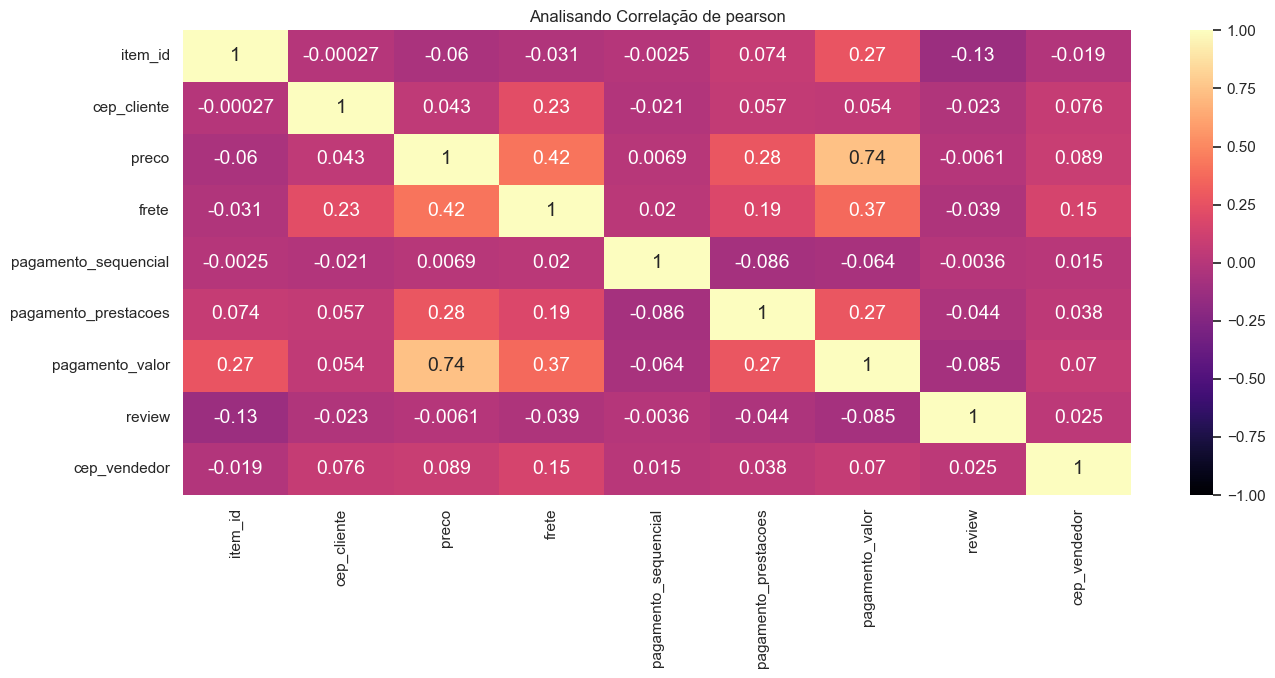

In [45]:
display(df_trusted[['preco', 'frete', 'pagamento_prestacoes', 'pagamento_valor']].describe())
analisa_correlacao('pearson', df_raw)

#### 1. Aparentemente, as features não tem uma correlação linear forte, a não ser o pagamento do valor e o preço do produto.

#### 2. O frete e o preço também possuem uma correlação linear significativa, mas não chega a ser muito alta.

## 2.2) Análise Geográfica 

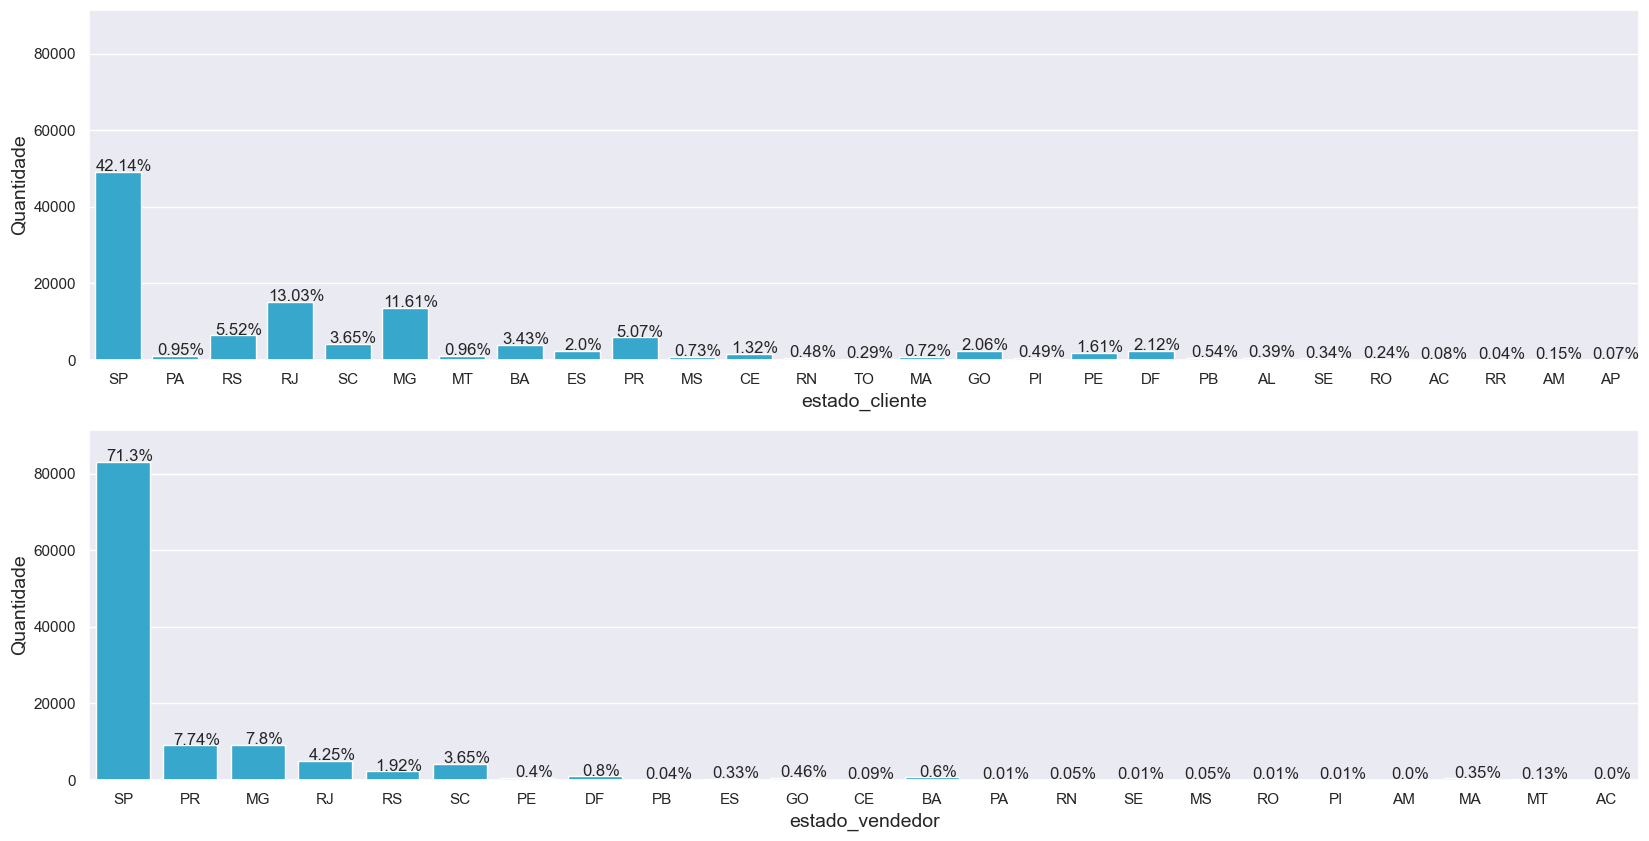

In [46]:
plota_barras(['estado_cliente', 'estado_vendedor'], False, df_trusted, 2, 1)

#### 1. Há grande concentração de Clientes e Vendedores nas Regiões Sudeste (destaque para SP, RJ e MG) e Sul (destaque para PR, RS, SC).

## 2.3) Análise de Produtos

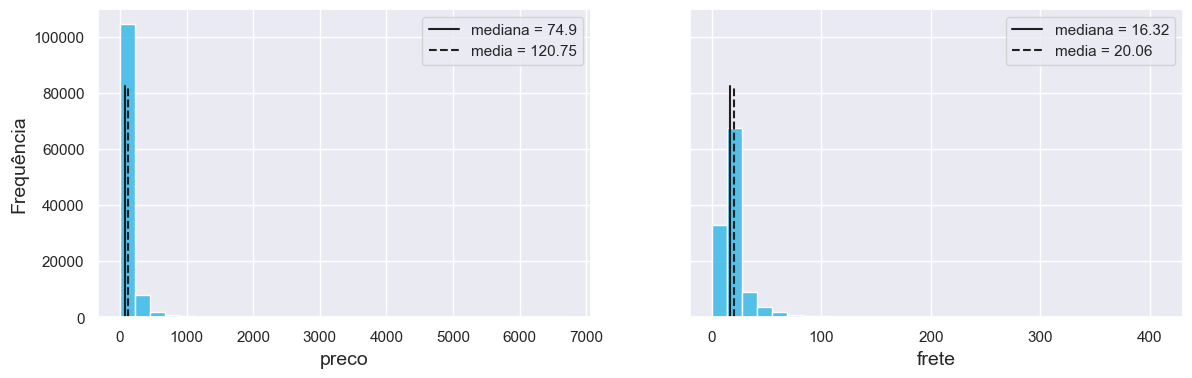

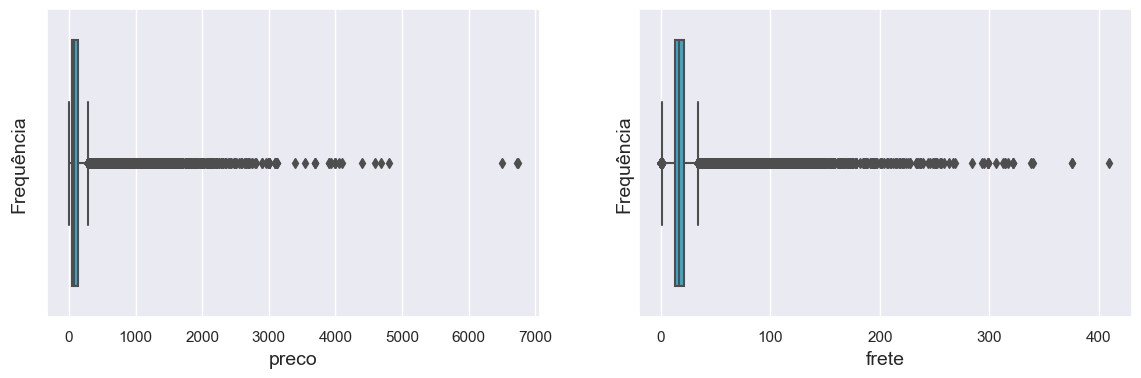

In [47]:
plota_histograma(['preco', 'frete'], df_trusted, 1, 2)
plota_boxplot(['preco', 'frete'], df_trusted, 1, 2)

#### 1. A grande parte dos Produtos são de valor e fretes relativamente baixos, com medianas em torno de 75 e 16 reais, respectivamente.

#### 2. Embora grande parte dos Produtos sigam a regra acima, há a presença de diversos Outliers, ou seja, Produtos com Valor e Fretes muito altos.

## 2.4) Análise de Pagamento

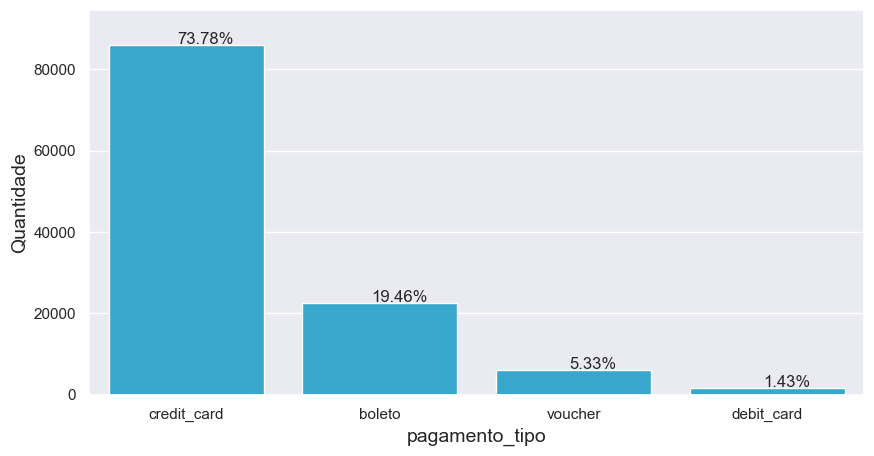

In [48]:
plota_barras(['pagamento_tipo'], False, df_trusted, 1, 1)

#### 1. Grande domínio de compras via Cartão de Crédito e Boleto

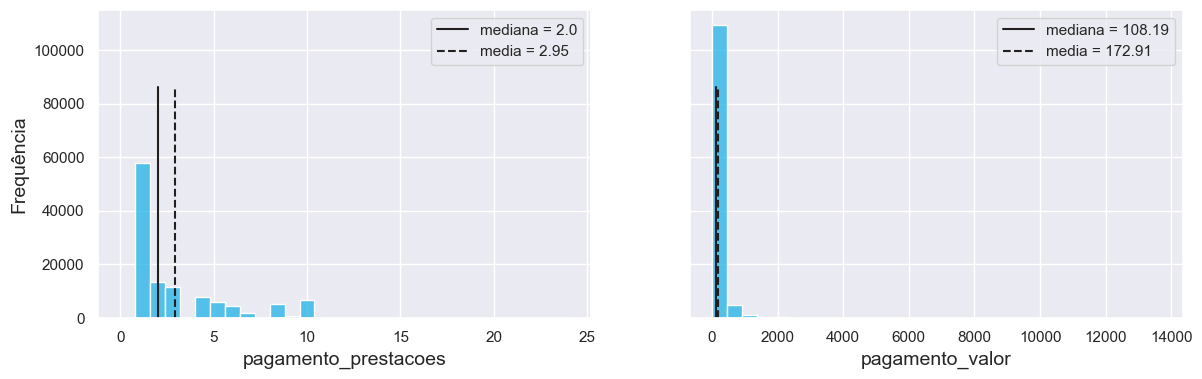

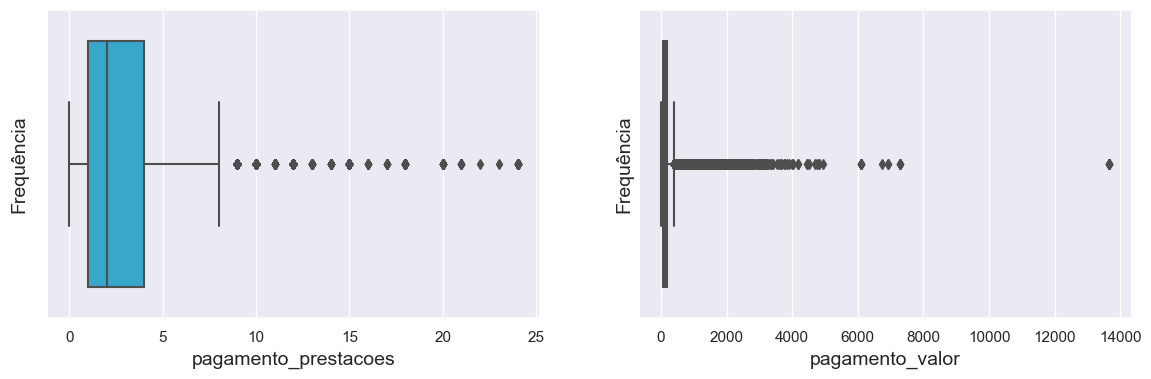

In [49]:
plota_histograma(['pagamento_prestacoes', 'pagamento_valor'], df_trusted, 1, 2)
plota_boxplot(['pagamento_prestacoes', 'pagamento_valor'], df_trusted, 1, 2)

#### 1. A maioria das prestações são concentradas em baixas parcelas, o que faz sentido, dado que a grande maioria dos produtos são de baixo valor, todavia, também há presença de Outliers que provavelmente advém de produtos com valor alto.

#### 2. A distribuição de valor para o pagamento segue próxima a do preço dos produtos.

## 2.5) Análise de Opinião

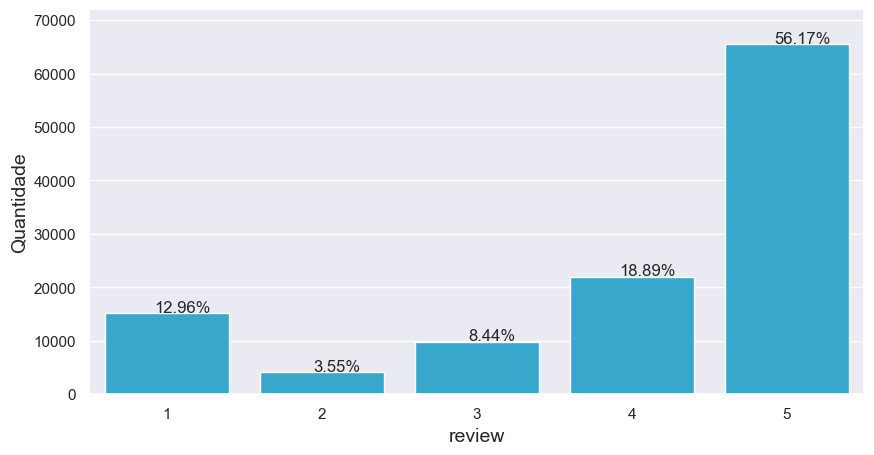

In [50]:
plota_barras(['review'], False, df_trusted, 1, 1)

#### 1. Boa parte dos clientes acredita que o serviço é entre médio (3) e excelente (5).

# <font color='red' style='font-size: 40px;'> 3.0 Análise Exploratória - Foco em Análises Bivariadas </font>
<hr style='border: 2px solid red;'>

#### 1. Para aplicarmos um teste de Hipóteses, deve-se analisar a Distribuição da variável para entender se necessita-se de um Teste Paramétrico ou um Teste Não-Paramétrico.

- Para essa tarefa, utilizou-se o Teste de Hipótese de Kolmogorov, o qual analisa a normalidade da variável.

- Se o p-value for menor que 0.05, rejeita-se a Hipótese Nula de que a variável segue uma Distribuição Normal.

- Além disso, utilizou-se como suporte o Gráfico QQPlot. Se os dados ajustarem-se à reta diagonal, então a variável segue uma Distribuição Normal.

#### 2. Caso ambas variáveis sigam uma Distribuição Normal, então, escolhe-se um Teste Paramétrico:

- O Teste Z é um teste de hipótese paramétrico que compara a média de duas amostras independentes

- H0: Não há diferença significativa entre as médias dos compotentes --> p_value > 0.05

- H1: Há diferença significativa entre as médias dos componentes --> p_value <= 0.05

#### 3. Caso ambas variáveis não sigam uma Distribuição Normal, então, escolhe-se um Teste Não-Paramétrico:

- O Teste de Mann Whitney é um teste de hipótese não-paramétrico que compara a mediana de duas amostras independentes

- H0: Não há diferença significativa entre as medianas dos componentes --> p_value > 0.05

- H1: Há diferença significativa entre as medianas das componentes --> p_value <= 0.05


## 3.1) Clientes do Estado de São Paulo possuem preços maiores que outros Estados?

Pelo Teste de Hipótese de Kolmogorov, a variável "preco" não segue uma Distribuição Normal


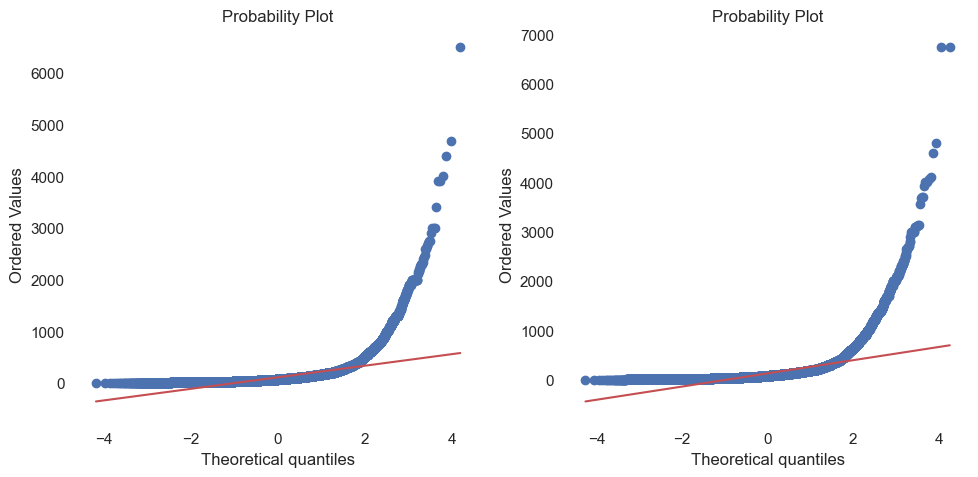

Mediana Amostra 1: 69.9
Mediana Amostra 2: 79.9
Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2


In [51]:
df_precos_estado = df_trusted.copy()
df_precos_estado['estado_sp'] = np.where(df_precos_estado['estado_cliente'] == 'SP', 'Yes', 'No')

df_sp = df_precos_estado.loc[df_precos_estado.estado_sp == 'Yes']
df_outros_estados = df_precos_estado.loc[df_precos_estado.estado_sp == 'No']

analisa_normalidade(df_sp, df_outros_estados, 'preco')
teste_hipotese_duas_amostras_independentes(False, df_sp, df_outros_estados, 'preco')

#### 1. Nota-se que a variável 'Preço' não segue Distribuição Normal, portanto, aplicou-se um Teste Não-Paramétrico.

#### 2. Pelo Teste de Hipótese, confirmou-se que a diferença é significativa, portanto, pode ser que haja preços menores em produtos adquiridos por clientes de São Paulo.

## 3.2) Há diferença significativa entre os preços de compras no cartão de crédito e compras em outros meios de pagamento?

Pelo Teste de Hipótese de Kolmogorov, a variável "preco" não segue uma Distribuição Normal


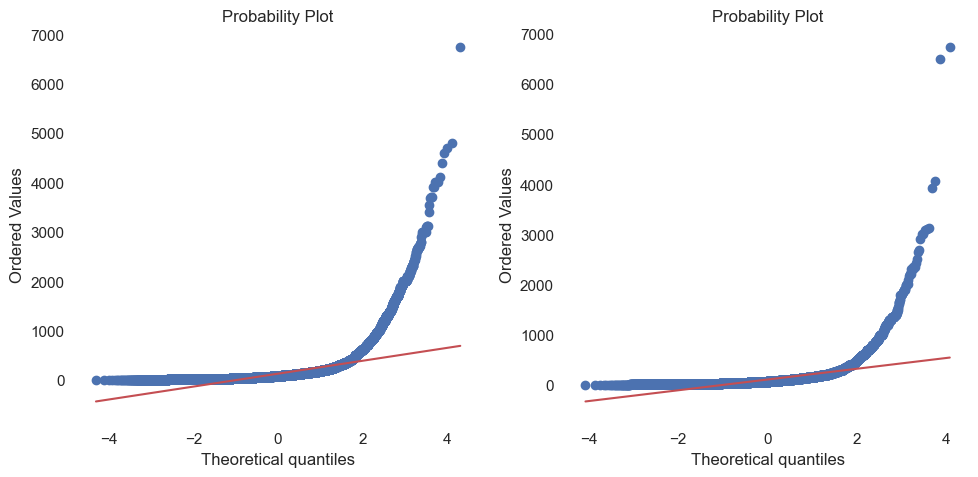

Mediana Amostra 1: 79.0
Mediana Amostra 2: 64.99
Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2


In [52]:
df_meios_de_pagamento = df_trusted.copy()
df_meios_de_pagamento['credito'] = np.where(df_meios_de_pagamento['pagamento_tipo'] == 'credit_card', 'Yes', 'No')

df_credito= df_meios_de_pagamento.loc[df_meios_de_pagamento.credito == 'Yes']
df_outros_meios_de_pagamento = df_meios_de_pagamento.loc[df_meios_de_pagamento.credito == 'No']

analisa_normalidade(df_credito, df_outros_meios_de_pagamento, 'preco')
teste_hipotese_duas_amostras_independentes(False, df_credito, df_outros_meios_de_pagamento, 'preco')

#### 1. Nota-se que a variável 'Preço' não segue Distribuição Normal, portanto, aplicou-se um Teste Não-Paramétrico.

#### 2. Pelo Teste de Hipótese, confirmou-se que a diferença entre é significativa, portanto, compras  de cartão de crédito aparentemente tendem a ter valores maiores que compras com outros meios de pagamento.

## 3.3) Clientes que dão notas positivas (4 ou 5) possuem uma diferença entre data/horario de entrega e data/horario estimada significativamente diferentes dos clientes que dão notas negativas (1 ou 2)?

,pedido_entregue,data_estimada,review,diferenca_data_dias,positivo_negativo,nota_boa
0,2017-05-25,2017-06-05,4,11,1,Yes
1,2017-11-28,2017-12-19,1,21,1,No
2,2017-11-28,2017-12-19,1,21,1,No
3,2017-05-26,2017-06-12,3,17,1,No
4,2018-02-28,2018-03-22,4,22,1,Yes


Pelo Teste de Hipótese de Kolmogorov, a variável "diferenca_data_dias" não segue uma Distribuição Normal


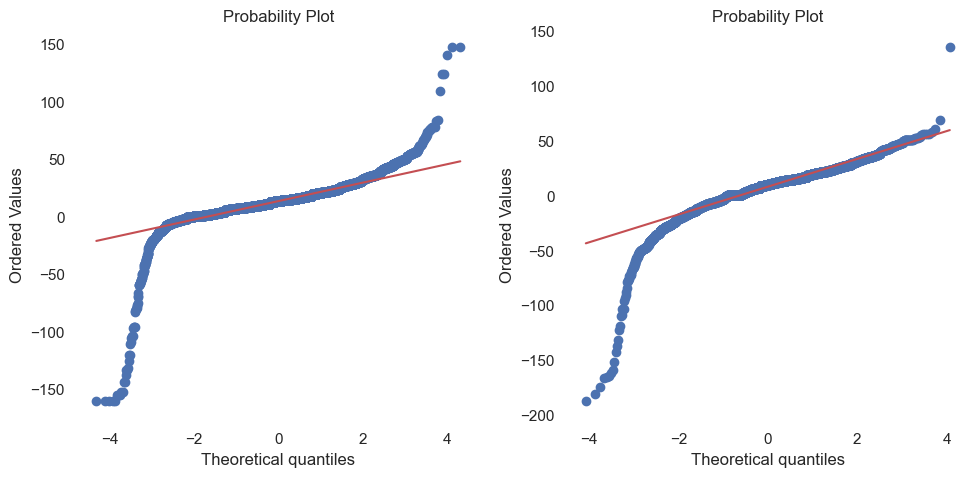

Mediana Amostra 1: 13.0
Mediana Amostra 2: 9.0
Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2


1    84119
0     3377
Name: positivo_negativo, dtype: int64

1    21030
0     8055
Name: positivo_negativo, dtype: int64

In [53]:
df_horarios = df_trusted.copy()
df_horarios = df_horarios[['pedido_entregue', 'data_estimada', 'review']]
df_horarios['pedido_entregue'] = pd.to_datetime(df_horarios['pedido_entregue']).dt.date
df_horarios['data_estimada'] = pd.to_datetime(df_horarios['data_estimada']).dt.date
df_horarios['diferenca_data_dias'] = df_horarios['data_estimada'] - df_horarios['pedido_entregue']
df_horarios['diferenca_data_dias'] = df_horarios['diferenca_data_dias'].apply(lambda x:int(str(x)[:8].replace(' 0', '').replace(' days', '').replace(' day', '').replace('NaT', '0')))
df_horarios['positivo_negativo'] = np.where(df_horarios['diferenca_data_dias'] > 0, 1, 0)
df_horarios['nota_boa'] = np.where((df_horarios['review'] == 4) | (df_horarios['review'] == 5), 'Yes', 'No')

display(df_horarios.head())

df_notas_boas= df_horarios.loc[df_horarios.nota_boa == 'Yes']
df_outras_notas = df_horarios.loc[df_horarios.nota_boa == 'No']

analisa_normalidade(df_notas_boas, df_outras_notas, 'diferenca_data_dias')
teste_hipotese_duas_amostras_independentes(False, df_notas_boas, df_outras_notas, 'diferenca_data_dias')

display((df_notas_boas.positivo_negativo.value_counts()))
display(df_outras_notas.positivo_negativo.value_counts())


#### 1. Nota-se que a variável 'diferenca_data_dias' não segue Distribuição Normal, portanto, aplicou-se um Teste Não-Paramétrico.

#### 2. Pelo Teste de Hipótese, confirmou-se que a diferença é significativa, portanto, clientes que tem prazo de entrega mais satisfatório aparentam dar notas mais altas em comparação a clientes que tem prazo de entrega não tão satisfatório.

#### 3. Pelos números acima, nota-se que pessoas com notas mais baixas tem mais casos de prazos de entrega com atraso, ao passo que pessoas com notas mais altas tem menos casos.

## 3.4) Os Clientes de Estados mais afastados do polo econômico (Região Sudeste) possuem fretes significativamente diferentes dos Clientes perto deste polo?

Pelo Teste de Hipótese de Kolmogorov, a variável "frete" não segue uma Distribuição Normal


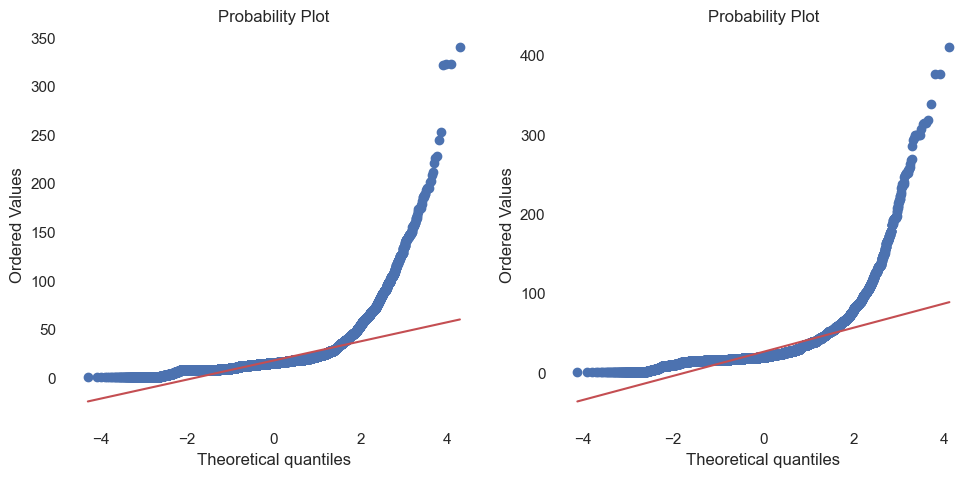

Mediana Amostra 1: 15.1
Mediana Amostra 2: 19.39
Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2


In [54]:
df_regioes = df_trusted.copy()
df_regioes['sudeste'] = np.where(df_regioes['estado_cliente'].isin(['SP', 'RJ', 'MG', 'ES']), 'Yes', 'No')

df_sudeste= df_regioes.loc[df_regioes.sudeste == 'Yes']
df_outras_regioes = df_regioes.loc[df_regioes.sudeste == 'No']

analisa_normalidade(df_sudeste, df_outras_regioes, 'frete')
teste_hipotese_duas_amostras_independentes(False, df_sudeste, df_outras_regioes, 'frete')

#### 1. Nota-se que a variável 'Frete' não segue Distribuição Normal, portanto, aplicou-se um Teste Não-Paramétrico.

#### 2. Pelo Teste de Hipótese, confirmou-se que a diferença entre é significativa, portanto, clientes fora da Região Sudeste aparentemente sofrem com fretes um pouco mais altos.

## 3.5) Existe um dia da semana em específico que concentra mais vendas que os demais?

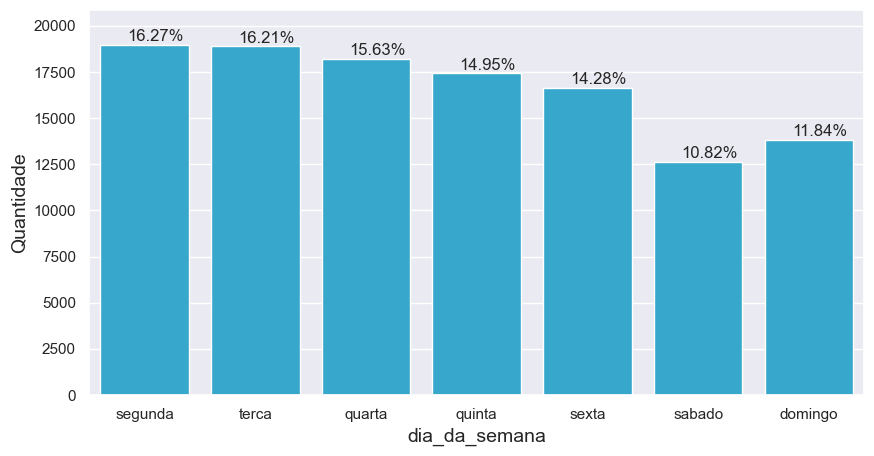

In [55]:
df_dia_da_semana = df_trusted.copy()
df_dia_da_semana['horario_pedido'] = pd.to_datetime(df_dia_da_semana['horario_pedido'])
df_dia_da_semana['dia_da_semana'] = df_dia_da_semana['horario_pedido'].dt.weekday
df_dia_da_semana.sort_values(by = 'dia_da_semana', ascending = True, inplace = True)
df_dia_da_semana['dia_da_semana'].replace({0:'segunda', 1:'terca', 2:'quarta', 3:'quinta', 4:'sexta', 5:'sabado', 6:'domingo'}, inplace = True)
plota_barras(['dia_da_semana'], False, df_dia_da_semana, 1, 1)

#### 1. Aparentemente há mais pedidos realizados em dias de semana do que no final de semana.

# <font color='red' style='font-size: 40px;'> 4.0 Pré-Processamento </font>
<hr style='border: 2px solid red;'>

<img src="./img1.jpeg" width="700">

#### RFM é a junção de três siglas: Recência, Frequência e Monetaridade. Essa técnica será nosso principal direcionamento na Segmentação de Clientes pois ela permite entender melhor o cliente ao verificar quando foi sua última compra, quantas vezes ele já comprou e quanto já gastou com sua empresa, por exemplo.

* 1. Recência (R): Fala o quão recente foi a compra de um cliente.

* 2. Frequência (F): Fala se o cliente compra frequentemente ou não.

* 3. Monetariedade (M): Fala quanto o cliente costuma gastar.

## 4.1) Feature Engineering

#### 1. Recência: A Recência diz respeito a quão foi recente a compra de um cliente, portanto, utiliza-se como base a data de compra mais recente da nossa base de dados e a data de compra mais recente de cada cliente.

In [56]:
df_recencia = df_trusted[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']].copy()
df_recencia = df_recencia.groupby('id_unico_cliente')['horario_pedido'].max().reset_index().rename({'horario_pedido':'data_max_compra'}, axis = 1)
df_recencia['data_max_compra'] = pd.to_datetime(df_recencia['data_max_compra'])
df_recencia['recencia'] = (df_recencia['data_max_compra'].max() - df_recencia['data_max_compra']).dt.days
df_recencia = df_recencia[['id_unico_cliente', 'recencia']]
df_recencia.head()

,id_unico_cliente,recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118
2,0000f46a3911fa3c0805444483337064,541
3,0000f6ccb0745a6a4b88665a16c9f078,325
4,0004aac84e0df4da2b147fca70cf8255,292


#### 1. A Frequência diz respeito a se o cliente compra frequentemente ou não, portanto, utiliza-se como base a quantidade de pedidos aprovados de cada cliente da nossa base.

In [57]:
df_frequencia = df_trusted[['id_unico_cliente', 'pedido_aprovado']].copy()
df_frequencia = df_frequencia.groupby('id_unico_cliente')['pedido_aprovado'].count().reset_index().rename({'pedido_aprovado':'frequencia'}, axis = 1)
df_frequencia.head()

,id_unico_cliente,frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


#### 1. A Monetariedade diz respeito diz respeito ao gasto do cliente, portanto, utiliza-se como base o valor do pagamento de cada cliente da nossa base.

In [58]:
df_monetariedade = df_trusted[['id_unico_cliente', 'pagamento_valor']].copy()
df_monetariedade = df_monetariedade.groupby('id_unico_cliente')['pagamento_valor'].sum().reset_index().rename({'pagamento_valor':'monetariedade'}, axis = 1)
df_monetariedade.head()

,id_unico_cliente,monetariedade
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


## 4.2) Juntando os Dataframes

In [59]:
df_refined = df_trusted.copy()

df_refined = df_refined.merge(df_recencia, on = 'id_unico_cliente', how = 'inner')
df_refined = df_refined.merge(df_frequencia, on = 'id_unico_cliente', how = 'inner')
df_refined = df_refined.merge(df_monetariedade, on = 'id_unico_cliente', how = 'inner')

df_refined.head()

,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,cep_vendedor,cidade_vendedor,estado_vendedor,recencia,frequencia,monetariedade
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,8577,itaquaquecetuba,SP,474,1,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,8577,itaquaquecetuba,SP,298,2,551.58
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,8577,itaquaquecetuba,SP,298,2,551.58
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,1,credit_card,7,140.61,3,moveis_escritorio,8577,itaquaquecetuba,SP,483,1,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,1,credit_card,10,137.58,4,moveis_escritorio,8577,itaquaquecetuba,SP,211,1,137.58


# <font color='red' style='font-size: 40px;'> 5.0 Aplicação de Modelos de Machine Learning </font>
<hr style='border: 2px solid red;'>

## 5.1) Definindo número ideal de Clusters

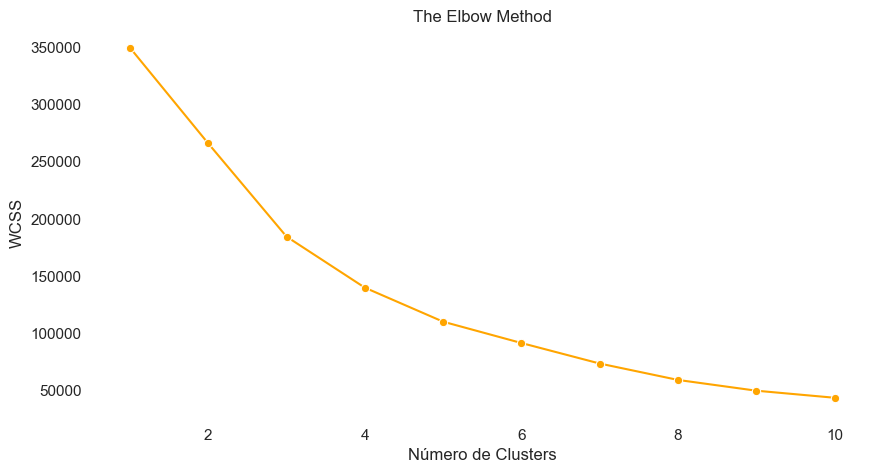

In [60]:
df_rfm = df_refined.copy()
df_rfm = df_rfm[['id_unico_cliente', 'recencia', 'frequencia', 'monetariedade']]
elbow_method(df_rfm, ['recencia', 'frequencia', 'monetariedade'])

#### 1. Embora há diversas Features no dataframe, utilizou-se apenas a recência, frequencia e monetariedade para a definição do número ideal de Clusters devido à Metodologia RFM.

#### 2. O resultado foi que 4 Clusters seria o número ideal.

## 5.2) Clusterizando com base na Recência 

In [61]:
def kmeans_esc(data, features , n_clusters):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
    kmeans = kmeans.fit(padronizado)
    
    clusters = kmeans.labels_ # Clusters para cada um dos registros 

    return clusters

In [62]:
df_rfm['recencia_cluster'] = kmeans_esc(df_rfm, ['recencia'], 4)
df_rfm.head()

,id_unico_cliente,recencia,frequencia,monetariedade,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87,1
1,9eae34bbd3a474ec5d07949ca7de67c0,298,2,551.58,3
2,9eae34bbd3a474ec5d07949ca7de67c0,298,2,551.58,3
3,3c799d181c34d51f6d44bbbc563024db,483,1,140.61,1
4,23397e992b09769faf5e66f9e171a241,211,1,137.58,0


In [63]:
media_cluster_recencia = df_rfm.groupby('recencia_cluster')['recencia'].mean().reset_index()
score_cluster_recencia = media_cluster_recencia.sort_values(by = 'recencia', ascending = False)
score_cluster_recencia['index'] = media_cluster_recencia.index 
score_cluster_recencia

,recencia_cluster,recencia,index
1,1,490.62,0
3,3,320.23,1
0,0,187.91,2
2,2,66.79,3


In [64]:
df_rfm = df_rfm.merge(score_cluster_recencia[['recencia_cluster', 'index']], on = 'recencia_cluster', how = 'inner')
df_rfm.drop('recencia_cluster', axis = 1, inplace = True)
df_rfm.rename({'index':'recencia_cluster'}, axis = 1, inplace = True)

In [65]:
df_rfm

,id_unico_cliente,recencia,frequencia,monetariedade,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,1,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,1,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,1,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,1,148.33,0
...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,12,1,314.32,3
116577,8d80e477643ec569b24592ce3d9dfc4c,41,2,169.26,3
116578,8d80e477643ec569b24592ce3d9dfc4c,41,2,169.26,3
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,36,1,77.50,3


## 5.3) Clusterizando com base na Frequência 

## 5.4) Clusterizando com base na Monetariedade 

# <font color='red' style='font-size: 40px;'> 6.0 Consolidação dos Resultados </font>
<hr style='border: 2px solid red;'>